# TEST Parser

In [1]:
def get_title(url):
    all_title = []
    for i in range(1, 10):
            r = requests.get(f'{url}{i}/')
            if r.status_code  != 404 :
                soup = BeautifulSoup(r.text, 'html.parser')
                all_p = soup.find_all('a', {'class': 'tm-title__link'})
                text = ''

                for p in all_p:
                    text = (p.text.strip() if len(p.text) >= 0 else "")
                    all_title.append(text)

                
    return all_title
  

In [2]:
import requests
from bs4 import BeautifulSoup
title = get_title('https://habr.com/ru/news/page')

In [3]:
def get_user(url):
    all_users= []
    for i in range(1, 10):
            r = requests.get(f'{url}{i}/')
            if r.status_code  != 404 :
                soup = BeautifulSoup(r.text, 'html.parser')
                all_p = soup.find_all('a', {'class': 'tm-user-info__username'})
                text = ''

                for p in all_p:
                    text = (p.text.strip() if len(p.text) >= 0 else "")
                    all_users.append(text)

                
    return all_users

In [4]:
users= get_user('https://habr.com/ru/news/page')

In [5]:
def get_views(url):
    views = []
    for i in range(1, 10):
            r = requests.get(f'{url}{i}/')
            if r.status_code  != 404 :
                soup = BeautifulSoup(r.text, 'html.parser')
                all_p = soup.find_all('span', {'class': 'tm-icon-counter__value'})
                text = ''

                for p in all_p:
                    text = (p.text.strip() if len(p.text) >= 0 else "")
                    if 'K' in text:
                        text = str(float(text[:-1]) * 1000)
                    views.append(text)

                
    return views

In [6]:
views = get_views('https://habr.com/ru/news/page')

In [7]:
def get_date(url):
    date = []
    for i in range(1, 10):
            r = requests.get(f'{url}{i}/')
            if r.status_code  != 404 :
                soup = BeautifulSoup(r.text, 'html.parser')
                all_p = soup.find_all('span', {'class': 'tm-article-datetime-published'})
                text = ''

                for p in all_p:
                    text = (str(p).strip()[
                        str(p).strip().rfind('=') + 2:str(p).strip().rfind('=') + 19] if len(str(p)) >= 0 else "")
                    date.append(text)

                
    return date

In [8]:
data = get_date('https://habr.com/ru/news/page')

In [9]:
def build_json(result_file_path = 'result_test_parser.json'):
    result = dict()
    result['data'] = data
    result['views'] = views
    result['users'] = users
    result['title'] = title
    
    result_json = json.loads(json.dumps(result))
    
    with open(result_file_path, 'w', encoding='utf-8') as f:
        json.dump(result_json, f, ensure_ascii=False)
    
    return result_json

In [10]:
import json
res_dict = build_json()

In [11]:
res_dict

{'data': ['2023-04-24, 23:36',
  '2023-04-24, 20:36',
  '2023-04-24, 20:25',
  '2023-04-24, 20:09',
  '2023-04-24, 19:41',
  '2023-04-24, 18:50',
  '2023-04-24, 18:10',
  '2023-04-24, 18:03',
  '2023-04-24, 17:58',
  '2023-04-24, 17:19',
  '2023-04-24, 17:14',
  '2023-04-24, 16:48',
  '2023-04-24, 16:25',
  '2023-04-24, 15:54',
  '2023-04-24, 15:02',
  '2023-04-24, 14:24',
  '2023-04-24, 14:04',
  '2023-04-24, 14:04',
  '2023-04-24, 14:01',
  '2023-04-24, 13:39',
  '2023-04-24, 13:26',
  '2023-04-24, 13:12',
  '2023-04-24, 12:54',
  '2023-04-24, 12:42',
  '2023-04-24, 12:04',
  '2023-04-24, 11:34',
  '2023-04-24, 11:01',
  '2023-04-24, 11:00',
  '2023-04-24, 10:47',
  '2023-04-24, 10:42',
  '2023-04-24, 10:27',
  '2023-04-24, 10:18',
  '2023-04-24, 10:07',
  '2023-04-24, 10:00',
  '2023-04-24, 09:47',
  '2023-04-24, 09:27',
  '2023-04-24, 09:16',
  '2023-04-24, 09:03',
  '2023-04-24, 08:50',
  '2023-04-24, 08:01',
  '2023-04-24, 07:10',
  '2023-04-24, 06:24',
  '2023-04-23, 23:53',
  '

In [12]:
df_data = []
for i in range(len(res_dict['data'])):
    df_data.append([res_dict['data'][i], res_dict['views'][i], res_dict['users'][i], res_dict['title'][i]])

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(data=df_data, columns=['Дата', 'Просмотры', 'Пользователи', 'Тема'])
df

,Дата,Просмотры,Пользователи,Тема
0,"2023-04-24, 23:36",1600.0,ancotir,ГКРЧ выбрало частоты для беспилотников
1,"2023-04-24, 20:36",7900.0,Markaty,Марк Цукерберг пообщался с сотрудниками и объя...
2,"2023-04-24, 20:25",2000.0,daniilshat,Разработчик представил JavaGPT — клиент для за...
3,"2023-04-24, 20:09",698,ancotir,BandLink запустил новый раздел с аналитикой из...
4,"2023-04-24, 19:41",405,denis-19,С 26 по 29 апреля пройдут Всероссийские соревн...
...,...,...,...,...
175,"2023-04-19, 13:14",1200.0,daniilshat,Adobe анонсировала ИИ-функции для Premiere Pro...
176,"2023-04-19, 12:57",215,ancotir,«Сколтех» откроет экспозицию «VR Колмогоров» в...
177,"2023-04-19, 12:56",1200.0,Markaty,В Meta сокращают около 4 тыс. человек и делают...
178,"2023-04-19, 12:50",337,denis-19,VK и Минэкономразвития запускают образовательн...


# TEST NLTK

In [15]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
from tqdm import tqdm
import pymorphy2
import re
tqdm.pandas()


morph = pymorphy2.MorphAnalyzer()


def lemmatize(words:list):
    text = []
    for word in words:
        morph_word = morph.parse(word)[0]
        if morph_word.tag.POS in ['NOUN', 'ADJF'] and morph_word[2] not in stopwords.words('russian'):
            text.append(morph_word[2])
    return text


def clear_text(text):
    clear_text = re.sub(r'[^А-Яа-я ]', '', str(text))
    tokens = clear_text.split()
    tokens = list(filter(lambda x: len(x) > 3, tokens))
    lemmatize_tokens = lemmatize(tokens)
    return lemmatize_tokens


def post_words_count(text):
    return len(text)

df['lemmatize_tokens'] = df['Тема'].progress_apply(lambda x: clear_text(x))

df['word_count'] = df['lemmatize_tokens'].progress_apply(lambda x: post_words_count(x))


100%|█████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 95991.70it/s]


In [17]:
df['clear_text'] = df['lemmatize_tokens'].progress_apply(lambda x: " ".join(x))
df

100%|█████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 95361.21it/s]


,Дата,Просмотры,Пользователи,Тема,lemmatize_tokens,word_count,clear_text
0,"2023-04-24, 23:36",1600.0,ancotir,ГКРЧ выбрало частоты для беспилотников,"[гкрч, частота, беспилотник]",3,гкрч частота беспилотник
1,"2023-04-24, 20:36",7900.0,Markaty,Марк Цукерберг пообщался с сотрудниками и объя...,"[марк, цукерберг, сотрудник, причина, масштабн...",9,марк цукерберг сотрудник причина масштабный ув...
2,"2023-04-24, 20:25",2000.0,daniilshat,Разработчик представил JavaGPT — клиент для за...,"[разработчик, клиент, запуск, старый, версия]",5,разработчик клиент запуск старый версия
3,"2023-04-24, 20:09",698,ancotir,BandLink запустил новый раздел с аналитикой из...,"[новый, раздел, аналитика, яндекс, музыка]",5,новый раздел аналитика яндекс музыка
4,"2023-04-24, 19:41",405,denis-19,С 26 по 29 апреля пройдут Всероссийские соревн...,"[апрель, всероссийский, соревнование, спортивн...",8,апрель всероссийский соревнование спортивный п...
...,...,...,...,...,...,...,...
175,"2023-04-19, 13:14",1200.0,daniilshat,Adobe анонсировала ИИ-функции для Premiere Pro...,[иифункция],1,иифункция
176,"2023-04-19, 12:57",215,ancotir,«Сколтех» откроет экспозицию «VR Колмогоров» в...,"[сколтех, экспозиция, колмогоров, день, летие,...",10,сколтех экспозиция колмогоров день летие велик...
177,"2023-04-19, 12:56",1200.0,Markaty,В Meta сокращают около 4 тыс. человек и делают...,"[человек, ставка, игровой, проект, метавселенная]",5,человек ставка игровой проект метавселенная
178,"2023-04-19, 12:50",337,denis-19,VK и Минэкономразвития запускают образовательн...,"[минэкономразвития, образовательный, проект, с...",6,минэкономразвития образовательный проект созда...


In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian") 
my_words = ['Василий', 'Геннадий', 'Виталий']
l=[stemmer.stem(p) for word in df['clear_text'] for p in word.split()]
l


['гкрч',
 'частот',
 'беспилотник',
 'марк',
 'цукерберг',
 'сотрудник',
 'причин',
 'масштабн',
 'увольнен',
 'крупн',
 'бонус',
 'топменеджер',
 'разработчик',
 'клиент',
 'запуск',
 'стар',
 'верс',
 'нов',
 'раздел',
 'аналитик',
 'яндекс',
 'музык',
 'апрел',
 'всероссийск',
 'соревнован',
 'спортивн',
 'программирован',
 'международн',
 'ден',
 'интернет',
 'обновлн',
 'бетатест',
 'настольн',
 'игр',
 'заявлен',
 'банкротств',
 'перв',
 'работ',
 'синдр',
 'самозванец',
 'ибсобыт',
 'верс',
 'слух',
 'вгарнитур',
 'аккумулятор',
 'смагнитн',
 'кабел',
 'ипорт',
 'дан',
 'китайск',
 'учн',
 'возможн',
 'создан',
 'помощ',
 'печа',
 'сооружен',
 'лун',
 'телекана',
 'центр',
 'кибератак',
 'сфер',
 'разработк',
 'лидер',
 'прирост',
 'регистрац',
 'нов',
 'бизнес',
 'росс',
 'аккаунт',
 'умерш',
 'знаменит',
 'нов',
 'син',
 'галочк',
 'верификац',
 'россет',
 'сколков',
 'энергопрор',
 'сбер',
 'собствен',
 'аналог',
 'масс',
 'файл',
 'состоян',
 'удален',
 'репозитор',
 'набор'

In [19]:
df['stem'] = df['clear_text'].progress_apply(lambda x: " ".join(list(map( lambda y: stemmer.stem(y), x.split()))))

100%|██████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 1555.40it/s]


In [20]:
df

,Дата,Просмотры,Пользователи,Тема,lemmatize_tokens,word_count,clear_text,stem
0,"2023-04-24, 23:36",1600.0,ancotir,ГКРЧ выбрало частоты для беспилотников,"[гкрч, частота, беспилотник]",3,гкрч частота беспилотник,гкрч частот беспилотник
1,"2023-04-24, 20:36",7900.0,Markaty,Марк Цукерберг пообщался с сотрудниками и объя...,"[марк, цукерберг, сотрудник, причина, масштабн...",9,марк цукерберг сотрудник причина масштабный ув...,марк цукерберг сотрудник причин масштабн уволь...
2,"2023-04-24, 20:25",2000.0,daniilshat,Разработчик представил JavaGPT — клиент для за...,"[разработчик, клиент, запуск, старый, версия]",5,разработчик клиент запуск старый версия,разработчик клиент запуск стар верс
3,"2023-04-24, 20:09",698,ancotir,BandLink запустил новый раздел с аналитикой из...,"[новый, раздел, аналитика, яндекс, музыка]",5,новый раздел аналитика яндекс музыка,нов раздел аналитик яндекс музык
4,"2023-04-24, 19:41",405,denis-19,С 26 по 29 апреля пройдут Всероссийские соревн...,"[апрель, всероссийский, соревнование, спортивн...",8,апрель всероссийский соревнование спортивный п...,апрел всероссийск соревнован спортивн программ...
...,...,...,...,...,...,...,...,...
175,"2023-04-19, 13:14",1200.0,daniilshat,Adobe анонсировала ИИ-функции для Premiere Pro...,[иифункция],1,иифункция,иифункц
176,"2023-04-19, 12:57",215,ancotir,«Сколтех» откроет экспозицию «VR Колмогоров» в...,"[сколтех, экспозиция, колмогоров, день, летие,...",10,сколтех экспозиция колмогоров день летие велик...,сколтех экспозиц колмогор ден лет велик матема...
177,"2023-04-19, 12:56",1200.0,Markaty,В Meta сокращают около 4 тыс. человек и делают...,"[человек, ставка, игровой, проект, метавселенная]",5,человек ставка игровой проект метавселенная,человек ставк игров проект метавселен
178,"2023-04-19, 12:50",337,denis-19,VK и Минэкономразвития запускают образовательн...,"[минэкономразвития, образовательный, проект, с...",6,минэкономразвития образовательный проект созда...,минэкономразвит образовательн проект создан со...


In [21]:
import nltk
df['bigrm'] = df['clear_text'].progress_apply(lambda x: list(nltk.bigrams(x.split())))
df['trigrams'] = df['clear_text'].progress_apply(lambda x: list(nltk.trigrams(x.split())))

100%|█████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 38333.32it/s]


In [22]:
df

,Дата,Просмотры,Пользователи,Тема,lemmatize_tokens,word_count,clear_text,stem,bigrm,trigrams
0,"2023-04-24, 23:36",1600.0,ancotir,ГКРЧ выбрало частоты для беспилотников,"[гкрч, частота, беспилотник]",3,гкрч частота беспилотник,гкрч частот беспилотник,"[(гкрч, частота), (частота, беспилотник)]","[(гкрч, частота, беспилотник)]"
1,"2023-04-24, 20:36",7900.0,Markaty,Марк Цукерберг пообщался с сотрудниками и объя...,"[марк, цукерберг, сотрудник, причина, масштабн...",9,марк цукерберг сотрудник причина масштабный ув...,марк цукерберг сотрудник причин масштабн уволь...,"[(марк, цукерберг), (цукерберг, сотрудник), (с...","[(марк, цукерберг, сотрудник), (цукерберг, сот..."
2,"2023-04-24, 20:25",2000.0,daniilshat,Разработчик представил JavaGPT — клиент для за...,"[разработчик, клиент, запуск, старый, версия]",5,разработчик клиент запуск старый версия,разработчик клиент запуск стар верс,"[(разработчик, клиент), (клиент, запуск), (зап...","[(разработчик, клиент, запуск), (клиент, запус..."
3,"2023-04-24, 20:09",698,ancotir,BandLink запустил новый раздел с аналитикой из...,"[новый, раздел, аналитика, яндекс, музыка]",5,новый раздел аналитика яндекс музыка,нов раздел аналитик яндекс музык,"[(новый, раздел), (раздел, аналитика), (аналит...","[(новый, раздел, аналитика), (раздел, аналитик..."
4,"2023-04-24, 19:41",405,denis-19,С 26 по 29 апреля пройдут Всероссийские соревн...,"[апрель, всероссийский, соревнование, спортивн...",8,апрель всероссийский соревнование спортивный п...,апрел всероссийск соревнован спортивн программ...,"[(апрель, всероссийский), (всероссийский, соре...","[(апрель, всероссийский, соревнование), (всеро..."
...,...,...,...,...,...,...,...,...,...,...
175,"2023-04-19, 13:14",1200.0,daniilshat,Adobe анонсировала ИИ-функции для Premiere Pro...,[иифункция],1,иифункция,иифункц,[],[]
176,"2023-04-19, 12:57",215,ancotir,«Сколтех» откроет экспозицию «VR Колмогоров» в...,"[сколтех, экспозиция, колмогоров, день, летие,...",10,сколтех экспозиция колмогоров день летие велик...,сколтех экспозиц колмогор ден лет велик матема...,"[(сколтех, экспозиция), (экспозиция, колмогоро...","[(сколтех, экспозиция, колмогоров), (экспозици..."
177,"2023-04-19, 12:56",1200.0,Markaty,В Meta сокращают около 4 тыс. человек и делают...,"[человек, ставка, игровой, проект, метавселенная]",5,человек ставка игровой проект метавселенная,человек ставк игров проект метавселен,"[(человек, ставка), (ставка, игровой), (игрово...","[(человек, ставка, игровой), (ставка, игровой,..."
178,"2023-04-19, 12:50",337,denis-19,VK и Минэкономразвития запускают образовательн...,"[минэкономразвития, образовательный, проект, с...",6,минэкономразвития образовательный проект созда...,минэкономразвит образовательн проект создан со...,"[(минэкономразвития, образовательный), (образо...","[(минэкономразвития, образовательный, проект),..."


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 1))

In [25]:
X2 = vectorizer2.fit_transform(df['clear_text'])

In [26]:
vectorizer2.get_feature_names()

C:\Users\Mika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['аврор',
 'автогигант',
 'автоматизация',
 'автономный',
 'автор',
 'автостоп',
 'администратор',
 'аккаунт',
 'аккумулятор',
 'анализ',
 'аналитика',
 'аналог',
 'андрей',
 'апрель',
 'арппа',
 'астраконф',
 'база',
 'базальт',
 'бан',
 'банкомат',
 'банкротство',
 'безопасность',
 'безответственность',
 'беспилотник',
 'беспилотный',
 'бетатест',
 'бетатестирование',
 'библиотека',
 'бизнес',
 'блогер',
 'блокировка',
 'бозон',
 'бонус',
 'босс',
 'бразильский',
 'бренд',
 'будущее',
 'булыжник',
 'введт',
 'вгарнитур',
 'ведение',
 'великий',
 'великобритания',
 'вендор',
 'верификация',
 'версия',
 'весь',
 'взлом',
 'взрыв',
 'взятие',
 'видео',
 'виджет',
 'вирусный',
 'вмосква',
 'внедрение',
 'внеземной',
 'вождение',
 'воздушный',
 'возможность',
 'возможный',
 'вор',
 'впрокат',
 'время',
 'вроссия',
 'всероссийский',
 'вспышка',
 'всша',
 'второй',
 'вызов',
 'выпуск',
 'выручка',
 'высокий',
 'выставка',
 'выход',
 'галактика',
 'галочка',
 'геймер',
 'генеративный',
 'гкр

In [27]:
df1 = pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names())
print(df1)

     аврор  автогигант  автоматизация  автономный  автор  автостоп  \
0        0           0              0           0      0         0   
1        0           0              0           0      0         0   
2        0           0              0           0      0         0   
3        0           0              0           0      0         0   
4        0           0              0           0      0         0   
..     ...         ...            ...         ...    ...       ...   
175      0           0              0           0      0         0   
176      0           0              0           0      0         0   
177      0           0              0           0      0         0   
178      0           0              0           0      0         0   
179      0           0              0           0      0         0   

     администратор  аккаунт  аккумулятор  анализ  ...  энергопрорыв  эппл  \
0                0        0            0       0  ...             0     0   
1    

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clear_text'])
vectorizer.get_feature_names()

X.toarray()

C:\Users\Mika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print(df2)

     аврор  автогигант  автоматизация  автономный  автор  автостоп  \
0      0.0         0.0            0.0         0.0    0.0       0.0   
1      0.0         0.0            0.0         0.0    0.0       0.0   
2      0.0         0.0            0.0         0.0    0.0       0.0   
3      0.0         0.0            0.0         0.0    0.0       0.0   
4      0.0         0.0            0.0         0.0    0.0       0.0   
..     ...         ...            ...         ...    ...       ...   
175    0.0         0.0            0.0         0.0    0.0       0.0   
176    0.0         0.0            0.0         0.0    0.0       0.0   
177    0.0         0.0            0.0         0.0    0.0       0.0   
178    0.0         0.0            0.0         0.0    0.0       0.0   
179    0.0         0.0            0.0         0.0    0.0       0.0   

     администратор  аккаунт  аккумулятор  анализ  ...  энергопрорыв  эппл  \
0              0.0      0.0          0.0     0.0  ...           0.0   0.0   
1    

In [31]:
result = pd.concat([df1, df2], axis=1)

In [32]:
result = pd.concat([df, result], axis=1)

In [33]:
result

,Дата,Просмотры,Пользователи,Тема,lemmatize_tokens,word_count,clear_text,stem,bigrm,trigrams,...,энергопрорыв,эппл,эффект,юпитер,юрлицо,явление,язык,языковой,яндекс,яндексинвестиция
0,"2023-04-24, 23:36",1600.0,ancotir,ГКРЧ выбрало частоты для беспилотников,"[гкрч, частота, беспилотник]",3,гкрч частота беспилотник,гкрч частот беспилотник,"[(гкрч, частота), (частота, беспилотник)]","[(гкрч, частота, беспилотник)]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,"2023-04-24, 20:36",7900.0,Markaty,Марк Цукерберг пообщался с сотрудниками и объя...,"[марк, цукерберг, сотрудник, причина, масштабн...",9,марк цукерберг сотрудник причина масштабный ув...,марк цукерберг сотрудник причин масштабн уволь...,"[(марк, цукерберг), (цукерберг, сотрудник), (с...","[(марк, цукерберг, сотрудник), (цукерберг, сот...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,"2023-04-24, 20:25",2000.0,daniilshat,Разработчик представил JavaGPT — клиент для за...,"[разработчик, клиент, запуск, старый, версия]",5,разработчик клиент запуск старый версия,разработчик клиент запуск стар верс,"[(разработчик, клиент), (клиент, запуск), (зап...","[(разработчик, клиент, запуск), (клиент, запус...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,"2023-04-24, 20:09",698,ancotir,BandLink запустил новый раздел с аналитикой из...,"[новый, раздел, аналитика, яндекс, музыка]",5,новый раздел аналитика яндекс музыка,нов раздел аналитик яндекс музык,"[(новый, раздел), (раздел, аналитика), (аналит...","[(новый, раздел, аналитика), (раздел, аналитик...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.373413,0.0
4,"2023-04-24, 19:41",405,denis-19,С 26 по 29 апреля пройдут Всероссийские соревн...,"[апрель, всероссийский, соревнование, спортивн...",8,апрель всероссийский соревнование спортивный п...,апрел всероссийск соревнован спортивн программ...,"[(апрель, всероссийский), (всероссийский, соре...","[(апрель, всероссийский, соревнование), (всеро...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,"2023-04-19, 13:14",1200.0,daniilshat,Adobe анонсировала ИИ-функции для Premiere Pro...,[иифункция],1,иифункция,иифункц,[],[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
176,"2023-04-19, 12:57",215,ancotir,«Сколтех» откроет экспозицию «VR Колмогоров» в...,"[сколтех, экспозиция, колмогоров, день, летие,...",10,сколтех экспозиция колмогоров день летие велик...,сколтех экспозиц колмогор ден лет велик матема...,"[(сколтех, экспозиция), (экспозиция, колмогоро...","[(сколтех, экспозиция, колмогоров), (экспозици...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
177,"2023-04-19, 12:56",1200.0,Markaty,В Meta сокращают около 4 тыс. человек и делают...,"[человек, ставка, игровой, проект, метавселенная]",5,человек ставка игровой проект метавселенная,человек ставк игров проект метавселен,"[(человек, ставка), (ставка, игровой), (игрово...","[(человек, ставка, игровой), (ставка, игровой,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
178,"2023-04-19, 12:50",337,denis-19,VK и Минэкономразвития запускают образовательн...,"[минэкономразвития, образовательный, проект, с...",6,минэкономразвития образовательный проект созда...,минэкономразвит образовательн проект создан со...,"[(минэкономразвития, образовательный), (образо...","[(минэкономразвития, образовательный, проект),...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# day2

<AxesSubplot:>

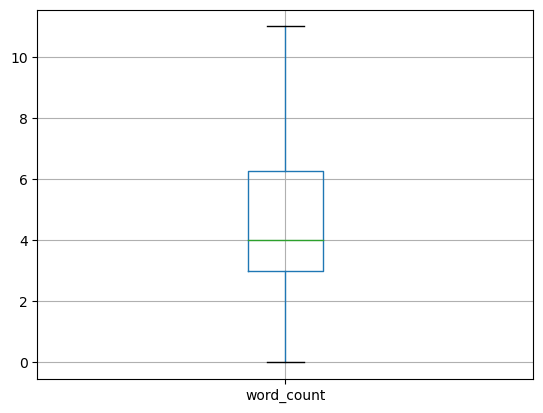

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df.boxplot("word_count")

In [61]:
#выборки


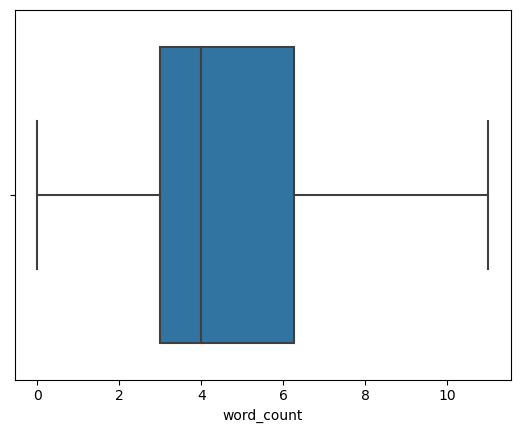

In [87]:
ax = sns.boxplot(x=result["word_count"])

In [88]:
quant = result["word_count"].quantile(0.6)# считаем квантиль 90 %
quant_low = result["word_count"].quantile(0.01)# считаем квантиль 10 %
df2 = result[result["word_count"] < quant] # убираем выбросы по квантилю
df2 = df2[df2["word_count"] > quant_low] # убираем выбросы по квантилю

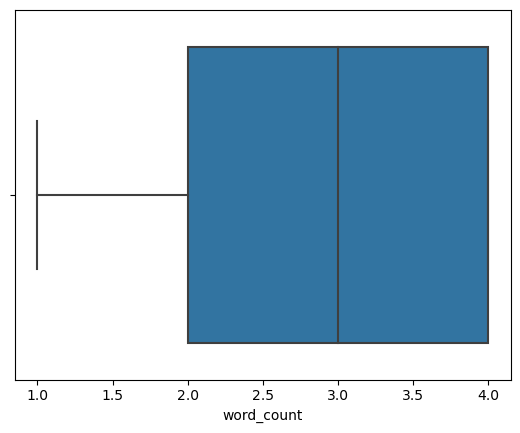

In [89]:
ax1 = sns.boxplot(x=df2['word_count'])

In [90]:
X = df2.drop("word_count", axis = 1) #Удаляем столбец с выборкой ответо из основного df
y = df2["word_count"] #Создаём выборку ответов

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [93]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge

In [98]:
X_df = result.drop('word_count', axis=1)

In [99]:
y = result['word_count']

In [100]:
X_train, X_valid, y_train, y_valid = train_test_split(X_df, y, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape)

(144, 1169) (36, 1169)


<AxesSubplot:>

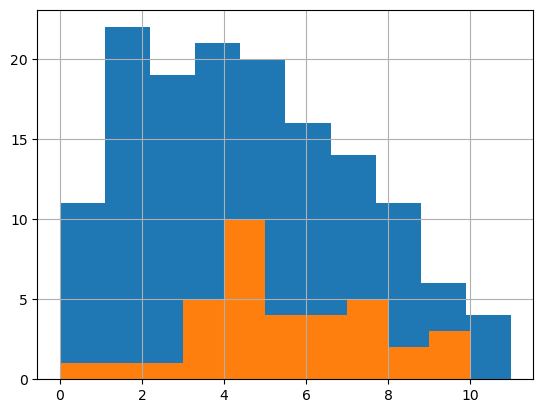

In [111]:
pd.Series(y_train).hist()
pd.Series(y_valid).hist()

In [153]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, LassoLars

In [154]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
LassoLars(alpha=0.1)
reg.coef_

array([0.71715729, 0.        ])

In [ ]:
#пошёл бред

In [128]:
y = result['word_count']

X_df = result.drop('word_count', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_df, y, test_size = 0.3, random_state=42)
print(X_train.shape, X_valid.shape)

(126, 1169) (54, 1169)


In [130]:
test_data = pd.read_csv('test.csv', index_col='id')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625134 entries, id3004672 to id0621643
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           625134 non-null  int64  
 1   pickup_datetime     625134 non-null  object 
 2   passenger_count     625134 non-null  int64  
 3   pickup_longitude    625134 non-null  float64
 4   pickup_latitude     625134 non-null  float64
 5   dropoff_longitude   625134 non-null  float64
 6   dropoff_latitude    625134 non-null  float64
 7   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [131]:
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

In [132]:
test_data = test_data.drop(['store_and_fwd_flag'], axis=1)
test_data['date'] = pd.to_datetime(test_data['pickup_datetime']).dt.normalize()

In [136]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [139]:
test_data = test_data.drop(['pickup_datetime'], axis=1)

In [140]:
test_data['pickup_month'] = test_data['date'].dt.month
test_data['pickup_day'] = test_data['date'].dt.day

In [141]:
test_data = test_data.drop(['vendor_id'], axis=1)

In [142]:
test_data['lenght_way'] = np.sqrt((
    test_data['pickup_longitude'] - test_data['dropoff_longitude']) ** 2 +(
    test_data['pickup_latitude'] - test_data['dropoff_latitude']) ** 2)

In [143]:
test_data

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,date,pickup_month,pickup_day,lenght_way
id,,,,,,,,,
id3004672,1,-73.988129,40.732029,-73.990173,40.756680,2016-06-30,6,30,0.024735
id3505355,1,-73.964203,40.679993,-73.959808,40.655403,2016-06-30,6,30,0.024979
id1217141,1,-73.997437,40.737583,-73.986160,40.729523,2016-06-30,6,30,0.013861
id2150126,1,-73.956070,40.771900,-73.986427,40.730469,2016-06-30,6,30,0.051363
id1598245,1,-73.970215,40.761475,-73.961510,40.755890,2016-06-30,6,30,0.010343
...,...,...,...,...,...,...,...,...,...
id3008929,1,-74.003464,40.725105,-74.001251,40.733643,2016-01-01,1,1,0.008819
id3700764,1,-74.006363,40.743782,-73.953407,40.782467,2016-01-01,1,1,0.065581
id2568735,2,-73.972267,40.759865,-73.876602,40.748665,2016-01-01,1,1,0.096318


In [144]:
from sklearn.cluster import KMeans
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

test_data_t = test_data.loc[:, features]


kmeans = KMeans(n_clusters=6, n_init=10, random_state=0)
test_data_t['CLuster'] = kmeans.fit_predict(test_data_t)
test_data_t['CLuster'] = test_data_t['CLuster'].astype('category')

In [ ]:
test_data_t = test_data_t.drop(features, axis=1)

In [ ]:
#пишем бред

In [ ]:
result.to_csv("data.csv")